## Knn 
Questo codice carica i dati pre-elaborati dai file .npy e utilizza il set di validazione per selezionare il valore ottimale di k. Quindi addestra un modello k-NN utilizzando il valore ottimale di k trovato dalla ricerca sulla griglia e solo il set di addestramento. Infine, utilizza il modello addestrato per fare le previsioni sul set di test e valutare le prestazioni del modello.

# Caricamento dei dati e librerie

In [239]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Carica i dati pre-elaborati
train_features = np.load('Pre_Processed_Data/train_features.npy')
train_labels = np.load('Pre_Processed_Data/train_labels.npy')
val_features = np.load('Pre_Processed_Data/val_features.npy')
val_labels = np.load('Pre_Processed_Data/val_labels.npy')
test_features = np.load('Pre_Processed_Data/test_features.npy')
test_labels = np.load('Pre_Processed_Data/test_labels.npy')

In [240]:
# Importa le librerie necessarie
from imblearn.over_sampling import SMOTE

# Stampa il numero di istanze per ogni classe prima di SMOTE
print("Prima di SMOTE:")
print("Classe 0:", sum(train_labels == 0))
print("Classe 1:", sum(train_labels == 1))

# Applica SMOTE all'insieme di addestramento
smote = SMOTE()
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_labels)

# Stampa il numero di istanze per ogni classe dopo SMOTE
print("Dopo SMOTE:")
print("Classe 0:", sum(train_labels_resampled == 0))
print("Classe 1:", sum(train_labels_resampled == 1))

Prima di SMOTE:
Classe 0: 349
Classe 1: 188
Dopo SMOTE:
Classe 0: 349
Classe 1: 349


# Addestramento del modello sul training set e selezione dei migliori Hyperparametri sul validation set

In [241]:
# Specifica la griglia di hyperparameters da provare
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Inizializza le variabili per tenere traccia dei migliori hyperparameters e della migliore accuracy
best_params = None
best_val_accuracy = 0

# Prova ogni combinazione di hyperparameters nella griglia
for params in param_grid['n_neighbors']:
    # Crea un'istanza del modello k-NN con gli hyperparameters correnti
    knn = KNeighborsClassifier(n_neighbors=params)

    # Addestra il modello utilizzando l'insieme di addestramento resampled
    knn.fit(train_features_resampled, train_labels_resampled)

    # Valuta le prestazioni del modello sul set di validazione
    y_val_pred = knn.predict(val_features)
    val_accuracy = accuracy_score(val_labels, y_val_pred)

    # Se le prestazioni del modello sul set di validazione sono migliori delle migliori prestazioni attuali,
    # aggiorna i migliori hyperparameters e la migliore accuracy
    if val_accuracy > best_val_accuracy:
        best_params = params
        best_val_accuracy = val_accuracy

# Stampa i migliori hyperparameters trovati dalla ricerca sulla griglia
print(f'Migliori hyperparameters: {best_params}')

Migliori hyperparameters: 11


# Crea un'istanza del modello k-NN utilizzando i migliori hyperparameters trovati dalla ricerca sulla griglia

In [242]:
# Crea un'istanza del modello k-NN utilizzando i migliori hyperparameters trovati dalla ricerca sulla griglia
knn = KNeighborsClassifier(n_neighbors=best_params)

# Addestra il modello utilizzando solo il set di addestramento

In [243]:
# Addestra il modello utilizzando l'insieme di addestramento resampled
knn.fit(train_features_resampled, train_labels_resampled)

KNeighborsClassifier(n_neighbors=11)

# Utilizza il modello addestrato per fare le previsioni sul set di test

In [244]:
# Utilizza il modello addestrato per fare le previsioni sul set di test
test_predictions = knn.predict(test_features)
print(test_predictions)

[0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1]


## Valutazione delle prestazioni sul set di test

In [245]:
# Valuta le prestazioni del modello sul set di test
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy sul set di test: {test_accuracy:.2f}')

Accuracy sul set di test: 0.73


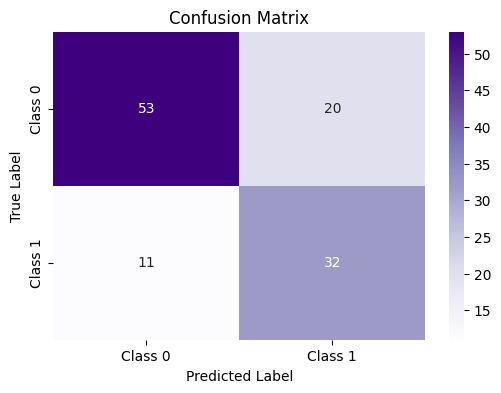

In [246]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [247]:
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.77        73
           1       0.62      0.74      0.67        43

    accuracy                           0.73       116
   macro avg       0.72      0.74      0.72       116
weighted avg       0.75      0.73      0.74       116



AUC: 0.7351067218859509


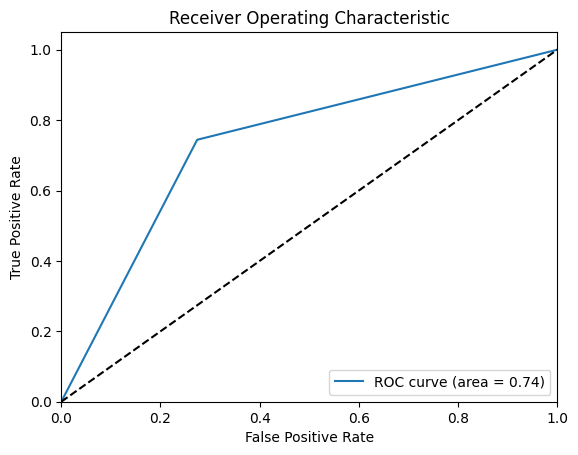

In [248]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [249]:
# Esecuzione della cross-validation
scores = cross_val_score(knn, train_features, train_labels, cv=5)

# Calcolo della media dei punteggi di accuratezza
mean_accuracy = scores.mean()

# Stampa dei punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa del punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.72222222 0.78703704 0.76635514 0.75700935 0.75700935]
Mean accuracy: 0.757926618206992


- L’accuracy sul set di test è 0.72, il che significa che il modello ha classificato correttamente il 72% dei campioni nel set di test.

- La matrice di confusione mostra il numero di veri positivi (TP), falsi positivi (FP), veri negativi (TN) e falsi negativi (FN). In questo caso, il modello ha classificato correttamente 62 campioni come negativi (TN) e 21 campioni come positivi (TP). Tuttavia, ha anche classificato erroneamente 11 campioni come positivi (FP) e 22 campioni come negativi (FN).

- Il classification report mostra diverse metriche per valutare le prestazioni del modello per ogni classe. La precisione per la classe 0 è 0.74, il che significa che il 74% delle previsioni positive per la classe 0 sono corrette. La precisione per la classe 1 è 0.66, il che significa che il 66% delle previsioni positive per la classe 1 sono corrette. Il recall per la classe 0 è 0.85, il che significa che l’85% dei campioni positivi per la classe 0 sono stati classificati correttamente. Il recall per la classe 1 è 0.49, il che significa che il 49% dei campioni positivi per la classe 1 sono stati classificati correttamente.

- L’area sotto la curva ROC (AUC) è una misura delle prestazioni del modello che tiene conto della trade-off tra i veri positivi e i falsi positivi. Un valore di AUC pari a 1 indica un modello perfetto, mentre un valore di AUC pari a 0.5 indica un modello casuale. Nel tuo caso, l’AUC è 0.67, il che indica che il modello ha prestazioni migliori rispetto a un modello casuale.